In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

In [2]:
df_data = pd.read_excel('data.xlsx', sheet_name='data')
df_data.columns = ['Temperature [Celsius]','Pd mol [mol %]','Arbin', 'K3PO4','Yield']
df_data

,Temperature [Celsius],Pd mol [mol %],Arbin,K3PO4,Yield
0,75,0.5,1.0,1.5,2.4
1,75,0.5,1.2,1.5,4.6
2,75,0.5,1.5,1.5,4.3
3,75,0.5,1.8,1.5,4.7
4,75,0.5,1.0,2.0,7.0
...,...,...,...,...,...
242,90,5.0,1.8,2.5,69.7
243,90,5.0,1.0,3.0,83.5
244,90,5.0,1.2,3.0,86.7
245,90,5.0,1.5,3.0,95.2


Dataset for Model Evaluation

In [3]:
df_data_eval= pd.read_excel('data.xlsx', sheet_name='data')
#df_data_eval = df_data_eval.iloc[1:]
#df_data_eval = df_data_eval.iloc[:,1:]
df_data_eval.columns = ['Temperature [Celsius]','Pd mol [mol %]','Arbin', 'K3PO4','Yield']

Data Preprocessing (e.g., Normalization, Distribution Change)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

std_scalerX = StandardScaler()
std_scalery = StandardScaler()
std_scalerX = [std_scalerX]
std_scalery = [std_scalery]

X = np.array(df_data.iloc[:,0:-1].values)
y = np.array(df_data.iloc[:,-1].values)
y = np.log(y.astype('float')) 
X_norm = std_scalerX[0].fit_transform(X)
y_norm = std_scalery[0].fit_transform(y.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size = 0.2, random_state=1)

Visualize X Distribution in Training Dataset

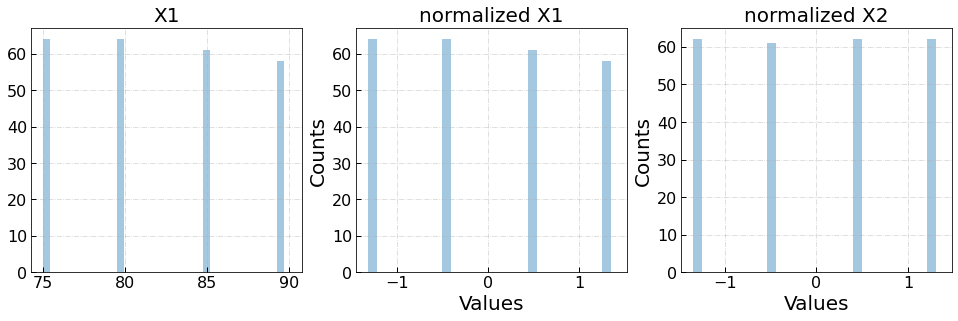

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(5.5*3, 4.5))
fs = 20

i = 0
axes[i].hist(np.array(df_data.iloc[:,0].values), bins =20, width = 0.4, alpha = 0.4)
axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
axes[i].grid(True, linestyle='-.')
axes[i].set_title('X1', fontsize = fs)

i = 1
axes[i].hist(X_norm[:,0], bins =20, width = 0.1, alpha = 0.4)
axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
axes[i].grid(True, linestyle='-.')
axes[i].set_xlabel('Values', fontsize = fs)
axes[i].set_ylabel('Counts', fontsize = fs)
axes[i].set_title('normalized X1', fontsize = fs)

i = 2
axes[i].hist(X_norm[:,1], bins =20, width = 0.1, alpha = 0.4)
axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
axes[i].grid(True, linestyle='-.')
axes[i].set_xlabel('Values', fontsize = fs)
axes[i].set_ylabel('Counts', fontsize = fs)
axes[i].set_title('normalized X2', fontsize = fs)

plt.show()

Visualize Y Distribution in Training Dataset

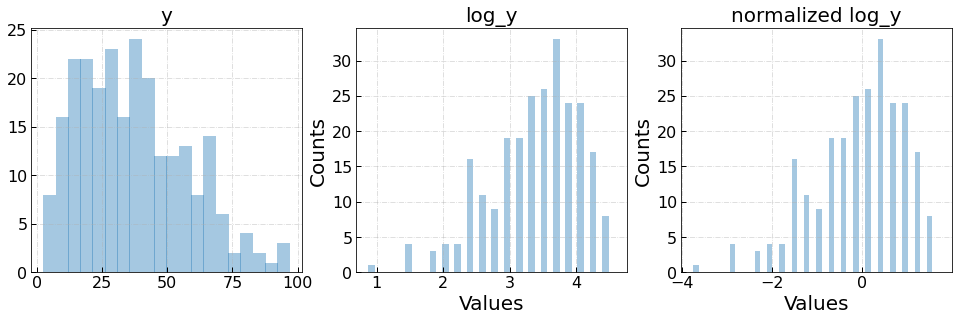

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(5.5*3, 4.5))
fs = 20

i = 0
axes[i].hist(np.array(df_data.iloc[:,-1].values), bins =20, width = 5, alpha = 0.4)
axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
axes[i].grid(True, linestyle='-.')
axes[i].set_title('y', fontsize = fs)

i = 1
axes[i].hist(y, bins =20, width = 0.1, alpha = 0.4)
axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
axes[i].grid(True, linestyle='-.')
axes[i].set_xlabel('Values', fontsize = fs)
axes[i].set_ylabel('Counts', fontsize = fs)
axes[i].set_title('log_y', fontsize = fs)

i = 2
axes[i].hist(y_norm, bins =20, width = 0.12, alpha = 0.4)
axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
axes[i].grid(True, linestyle='-.')
axes[i].set_xlabel('Values', fontsize = fs)
axes[i].set_ylabel('Counts', fontsize = fs)
axes[i].set_title('normalized log_y', fontsize = fs)

plt.show()

Check Noise Level

In [7]:
y_noise = (np.log(np.array(1.01).astype('float')-np.log(0.99).astype('float')))/2
print('normalized y noise:', np.around(y_noise,2))

normalized y noise: 0.01


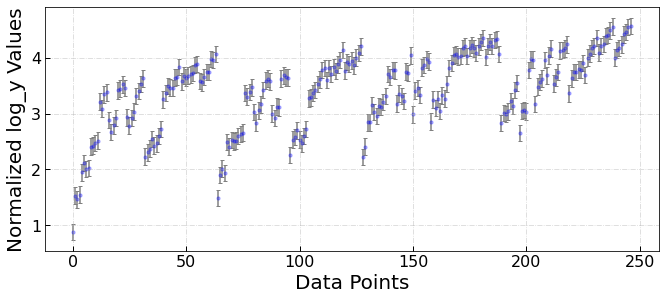

In [8]:
y_upper = std_scalery[0].transform(np.log(np.array(df_data.iloc[:,-1].values*1.05).astype('float')).reshape(-1,1))
y_lower = std_scalery[0].transform(np.log(np.array(df_data.iloc[:,-1].values*0.95).astype('float')).reshape(-1,1))
fig, ax = plt.subplots(1, 1, figsize=(5.5*2, 4.5))
fs = 20
ax.scatter(np.arange(len(y)),y, c = 'blue', alpha = 0.3, s = 10)
ax.errorbar(np.arange(len(y)),y, yerr = abs(y_upper-y_lower).ravel(), ms = 0, 
             ls = '', capsize = 2, alpha = 1,
             color = 'gray', zorder = 0)

ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
ax.grid(True, linestyle='-.')
ax.set_xlabel('Data Points', fontsize = fs)
ax.set_ylabel('Normalized log_y Values', fontsize = fs)

plt.show()

Define the "ground truth vs prediction" plot

In [9]:
def plt_true_vs_pred (y_true_list, y_pred_list, title_str, color):
    fig, axes = plt.subplots(1, 1, figsize=(5.5*1, 4.5))
    fs = 18
    y_true = np.exp(std_scalery[0].inverse_transform(y_true_list[0].reshape(-1,1)))
    y_pred = np.exp(std_scalery[0].inverse_transform(y_pred_list[0].reshape(-1,1)))
#       y_true = np.exp(y_true_list[i].reshape(-1,1))
#       y_pred = np.exp(y_pred_list[i].reshape(-1,1))
    lims1 = (0*0.9, 1000*1.1)
    axes.scatter(y_true, y_pred, alpha = 0.3, c = color)
    axes.plot(lims1, lims1, 'k--', alpha=0.75, zorder=0)
    rmse_value = np.sqrt(mse(y_true, y_pred))
    mae_value = mae(y_true, y_pred)
    mape_value = mape(y_true, y_pred)

    title = title_str + " (MAPE=%.2f" % mape_value+')'
    axes.set_xlabel('Ground Truth', fontsize = fs)
    axes.set_ylabel('Prediction', fontsize = fs)
    axes.set_title(title, fontsize = fs)
    axes.set_xlim(0,100)
    axes.set_ylim(0,100)

    axes.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    axes.grid(True, linestyle='-.')

        
    plt.subplots_adjust(wspace = 0.4)
    plt.show()

Evaluating Different Regression Models

Linear Regression

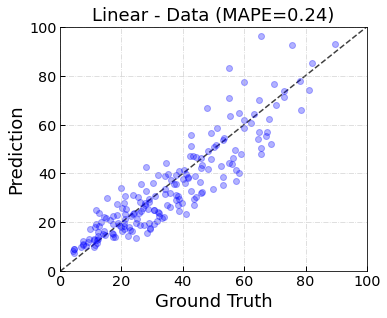

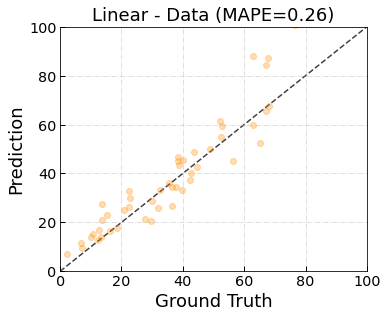

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

plt_true_vs_pred([y_train], [y_pred_train],'Linear - Data','blue')
plt_true_vs_pred([y_test], [y_pred_test], 'Linear - Data','darkorange')

Gradient Boosting Regression

In [11]:
gb_regr_A = GradientBoostingRegressor(n_estimators=500)#, loss = 'lad'）
gb_regr_A.fit(X_train,y_train.ravel())
y_pred_train = gb_regr_A.predict(X_train)
y_pred_test = gb_regr_A.predict(X_test)

from scipy import stats 

param_distributions = {
    'n_estimators': stats.randint(low=10, high=1000),
    'max_depth': stats.randint(low=2, high=10),
    'min_samples_split': stats.randint(low=2, high=5),
    'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01]
}

from sklearn.model_selection import RandomizedSearchCV

X_train = [X_train]
X_test = [X_test]
y_train = [y_train]
y_test = [y_test]
y_pred_train = []
y_pred_test = []
for i in range (1):
    gb_reg = GradientBoostingRegressor()
    regressor_cv = RandomizedSearchCV(
        gb_reg, param_distributions=param_distributions,
        n_iter=50, verbose=True,n_jobs = -1)
    regressor_cv.fit(X_train[i], y_train[i].ravel())
    
    print('Best params: \n', regressor_cv.best_params_)
    
    y_pred_train.append(regressor_cv.predict(X_train[i]))
    y_pred_test.append(regressor_cv.predict(X_test[i]))

[y_pred_train] = y_pred_train
[y_pred_test] = y_pred_test

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params: 
 {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 967}


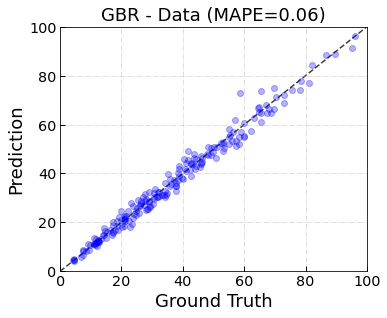

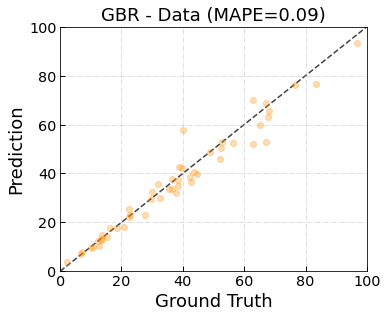

In [12]:
plt_true_vs_pred(y_train, [y_pred_train], 'GBR - Data','blue')
plt_true_vs_pred(y_test, [y_pred_test],'GBR - Data','darkorange')

Gaussian Process Regression - sklearn

In [13]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
kernel = RBF(length_scale=1) +  WhiteKernel(noise_level=(0.000001)**2) 
gp_regr_A = GaussianProcessRegressor(kernel = kernel)

[X_train] = X_train
[X_test] = X_test
[y_train] = y_train
[y_test] = y_test

gp_regr_A.fit(X_train,y_train)
y_pred_train = gp_regr_A.predict(X_train)
y_pred_test = gp_regr_A.predict(X_test)


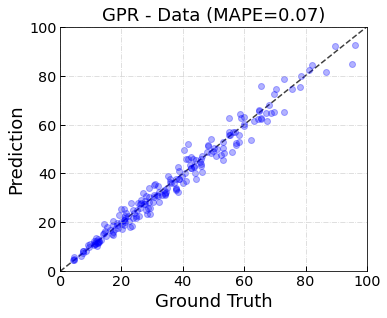

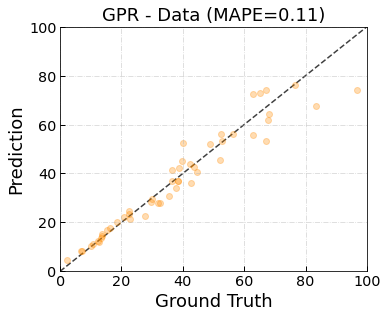

In [14]:
plt_true_vs_pred([y_train], [y_pred_train],'GPR - Data','blue')
plt_true_vs_pred([y_test],[y_pred_test], 'GPR - Data','darkorange')